In [1]:
import pandas as pd

df = pd.read_csv("day_wise.csv")

# Check the first few rows
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    188 non-null    object 
 1   Confirmed               188 non-null    int64  
 2   Deaths                  188 non-null    int64  
 3   Recovered               188 non-null    int64  
 4   Active                  188 non-null    int64  
 5   New cases               188 non-null    int64  
 6   New deaths              188 non-null    int64  
 7   New recovered           188 non-null    int64  
 8   Deaths / 100 Cases      188 non-null    float64
 9   Recovered / 100 Cases   188 non-null    float64
 10  Deaths / 100 Recovered  188 non-null    float64
 11  No. of countries        188 non-null    int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 17.8+ KB
None
         Date  Confirmed  Deaths  Recovered  Active  New cases  New deaths  \
0  2020

In [2]:
df = pd.read_csv("covid_19_clean_complete.csv") # Load the covid 19 dataset

print(df.info()) # Check dataset info

print(df.head()) # Display first few rows 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB
None
  Province/State Country/Region       Lat       Long        Date  Confirmed  \
0            NaN    Afghanistan  33.93911  67.709953  2020-01-22          0   
1            NaN        Albania  41.15330  20.168300  2020-01-22          0   
2            NaN        Algeria  28.03390   1.6

In [3]:
print(df.columns)

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'WHO Region'],
      dtype='object')


In [4]:
print(df.isnull().sum())

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64


In [6]:
df['Province/State'] = df['Province/State'].fillna("Unknown") #data cleaning #filling missing values

In [7]:
print(df.isnull().sum())

Province/State    0
Country/Region    0
Lat               0
Long              0
Date              0
Confirmed         0
Deaths            0
Recovered         0
Active            0
WHO Region        0
dtype: int64


In [8]:
# Check for duplicates
print(df.duplicated().sum())

# Remove duplicates
df.drop_duplicates(inplace=True)

0


In [9]:
# Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Verify the format
print(df.dtypes)


Province/State            object
Country/Region            object
Lat                      float64
Long                     float64
Date              datetime64[ns]
Confirmed                  int64
Deaths                     int64
Recovered                  int64
Active                     int64
WHO Region                object
dtype: object


In [10]:
# Rename columns
df.rename(columns={'Country/Region': 'Country', 'Province/State': 'State'}, inplace=True)

In [11]:
df.to_csv("covid19_cleaned.csv", index=False)

## Step 2: Exploratory Data Analysis (EDA)

In [22]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
# Load cleaned covid 19 dataset
df = pd.read_csv("covid19_cleaned.csv")

# Check the first few rows
print(df.head())

# Check data types and missing values
print(df.info())

# Summary statistics
print(df.describe())

     State      Country       Lat       Long        Date  Confirmed  Deaths  \
0  Unknown  Afghanistan  33.93911  67.709953  2020-01-22          0       0   
1  Unknown      Albania  41.15330  20.168300  2020-01-22          0       0   
2  Unknown      Algeria  28.03390   1.659600  2020-01-22          0       0   
3  Unknown      Andorra  42.50630   1.521800  2020-01-22          0       0   
4  Unknown       Angola -11.20270  17.873900  2020-01-22          0       0   

   Recovered  Active             WHO Region  
0          0       0  Eastern Mediterranean  
1          0       0                 Europe  
2          0       0                 Africa  
3          0       0                 Europe  
4          0       0                 Africa  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   State       49068 non-null  object 
 1   Country     

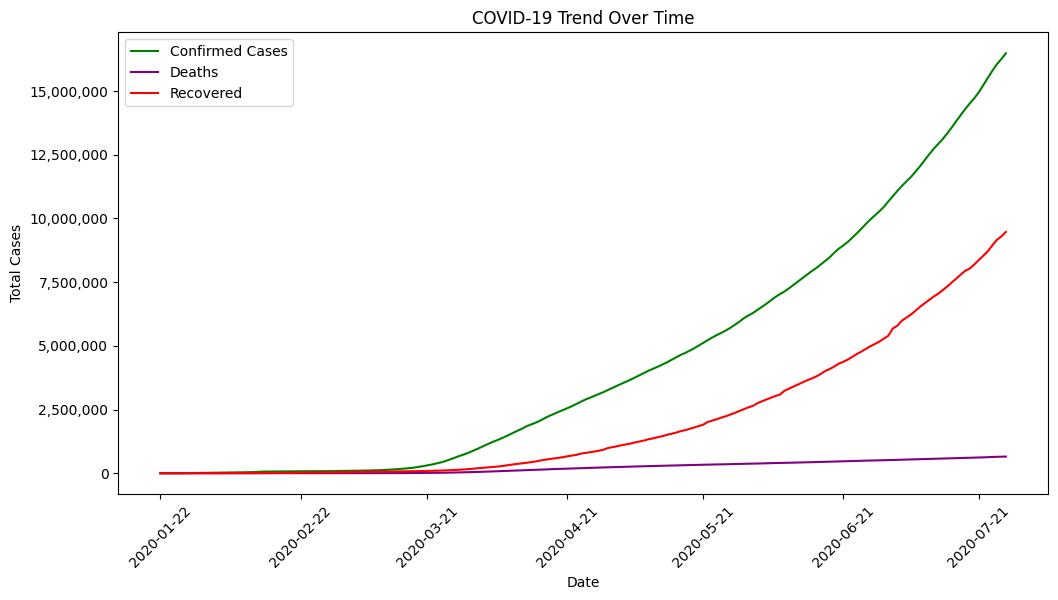

In [27]:
# Group data by Date and sum all cases
from matplotlib import dates as mdates
from matplotlib import ticker as ticker
%matplotlib inline

daily_cases = df.groupby('Date')[['Confirmed', 'Deaths', 'Recovered']].sum()

# Plot daily trends of cases
plt.figure(figsize=(12,6))
plt.plot(daily_cases.index, daily_cases['Confirmed'], label='Confirmed Cases', color='green')
plt.plot(daily_cases.index, daily_cases['Deaths'], label='Deaths', color='purple')
plt.plot(daily_cases.index, daily_cases['Recovered'], label='Recovered', color='red')

plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.title('COVID-19 Trend Over Time')
plt.legend()
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.show()

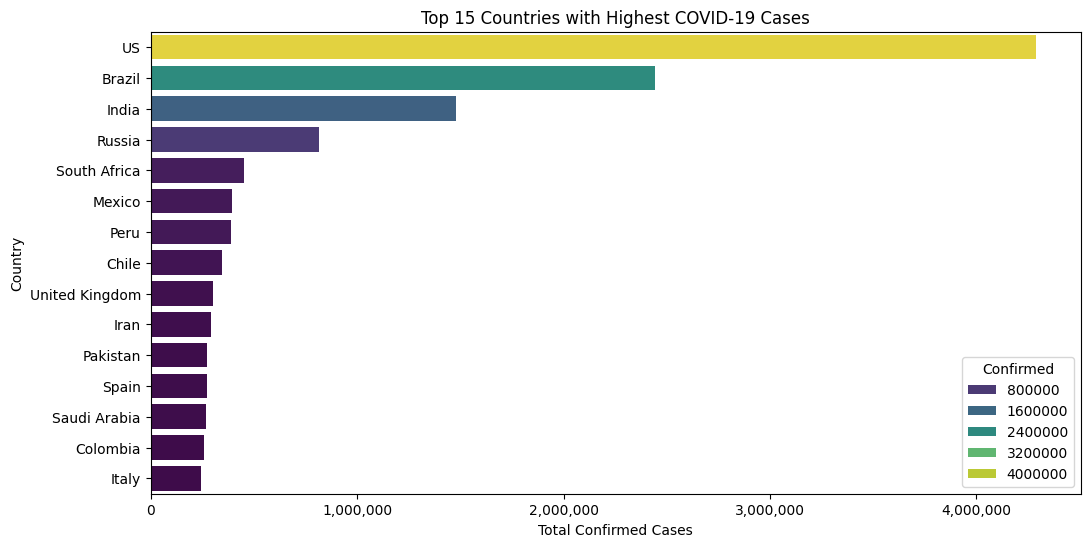

In [42]:
# Get latest data
from matplotlib import ticker as ticker
%matplotlib inline
latest_data = df[df['Date'] == df['Date'].max()]

# Get top 15 countries
top_countries = latest_data.groupby('Country')['Confirmed'].sum().nlargest(15)

# Plot bar chart
plt.figure(figsize=(12,6))
sns.barplot(x=top_countries.values, y=top_countries.index, hue=top_countries, palette='viridis')


plt.xlabel('Total Confirmed Cases')
plt.ylabel('Country')
plt.title('Top 15 Countries with Highest COVID-19 Cases')
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.show()

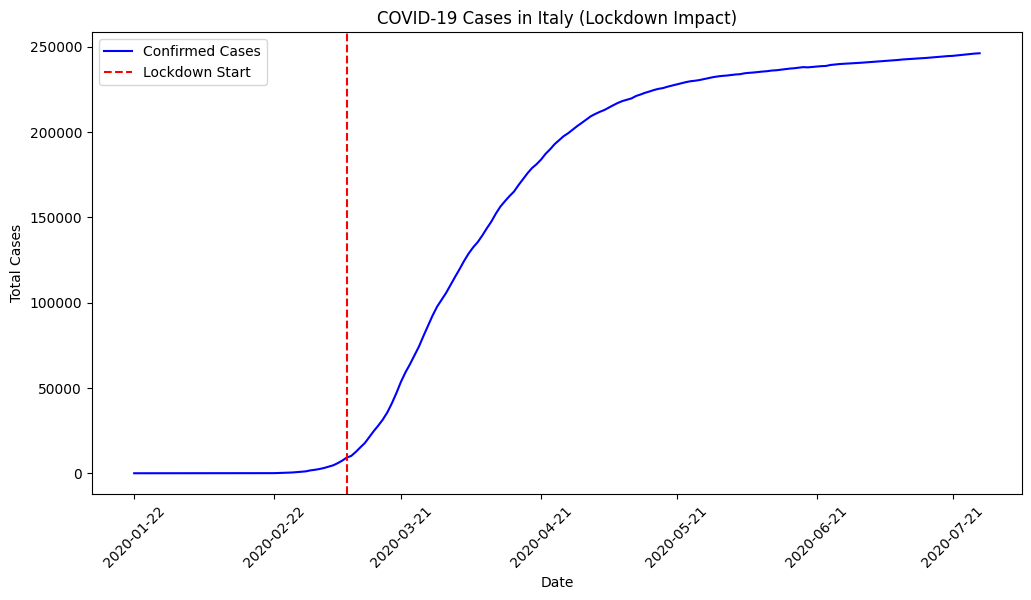

In [51]:
# Italy
from matplotlib import dates as mdates
from matplotlib import ticker as ticker
italy_data = df[df['Country'] == 'Italy']


# Plot cases before and after March 9, 2020 (Italy's lockdown date)
plt.figure(figsize=(12,6))
plt.plot(italy_data['Date'], italy_data['Confirmed'], label='Confirmed Cases', color='blue')

plt.axvline(x=pd.to_datetime('2020-03-09').strftime('%Y-%m-%d'), color='red', linestyle='dashed', label='Lockdown Start')


plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.title('COVID-19 Cases in Italy (Lockdown Impact)')
plt.legend()
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.show()

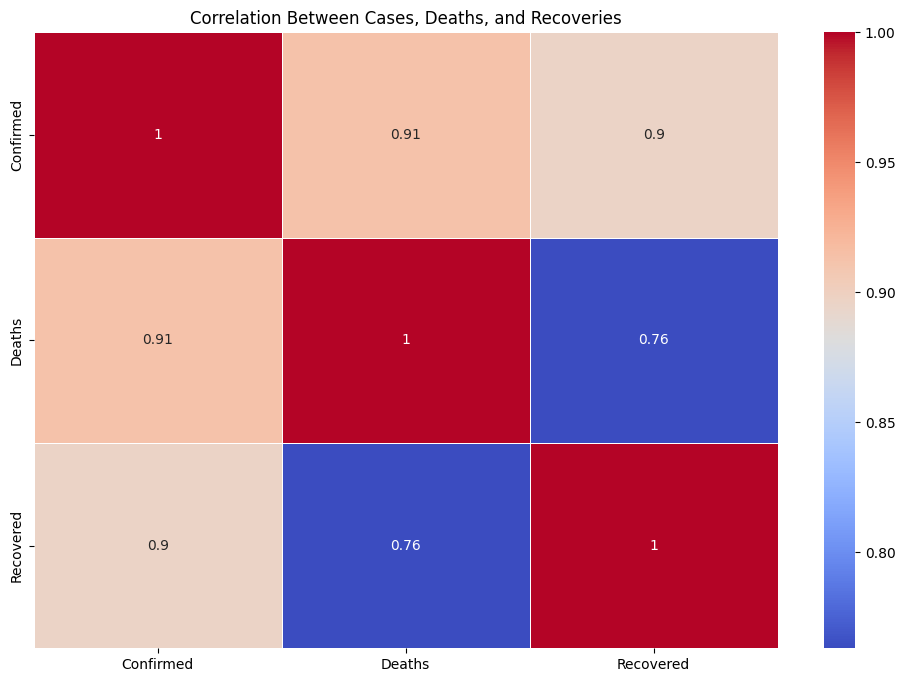

In [53]:
# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df[['Confirmed', 'Deaths', 'Recovered']].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Between Cases, Deaths, and Recoveries')
plt.show()

## Step 3: Identify Trends, Patterns, and Correlation

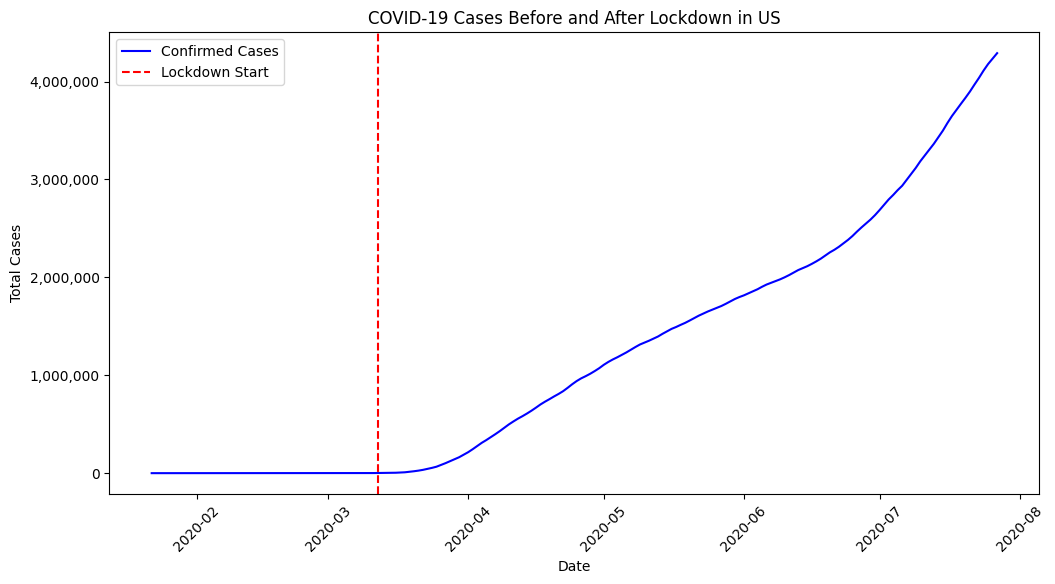

In [62]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib import dates as mdates
from matplotlib import ticker as ticker

covid_data = pd.read_csv("covid19_cleaned.csv")
# Convert 'Date' column to datetime format
covid_data['Date'] = pd.to_datetime(covid_data['Date'])

# Filter data for US
us_data = covid_data[covid_data['Country'] == 'US']

# Plot confirmed cases over time
plt.figure(figsize=(12,6))
plt.plot(us_data['Date'], us_data['Confirmed'], label='Confirmed Cases', color='blue')

# Mark lockdown start date
lockdown_date = pd.to_datetime('2020-03-12')
plt.axvline(x=lockdown_date, color='red', linestyle='dashed', label='Lockdown Start')

# Format x-axis for better readability
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.title('COVID-19 Cases Before and After Lockdown in US')
plt.legend()
plt.xticks(rotation=45)
plt.show()

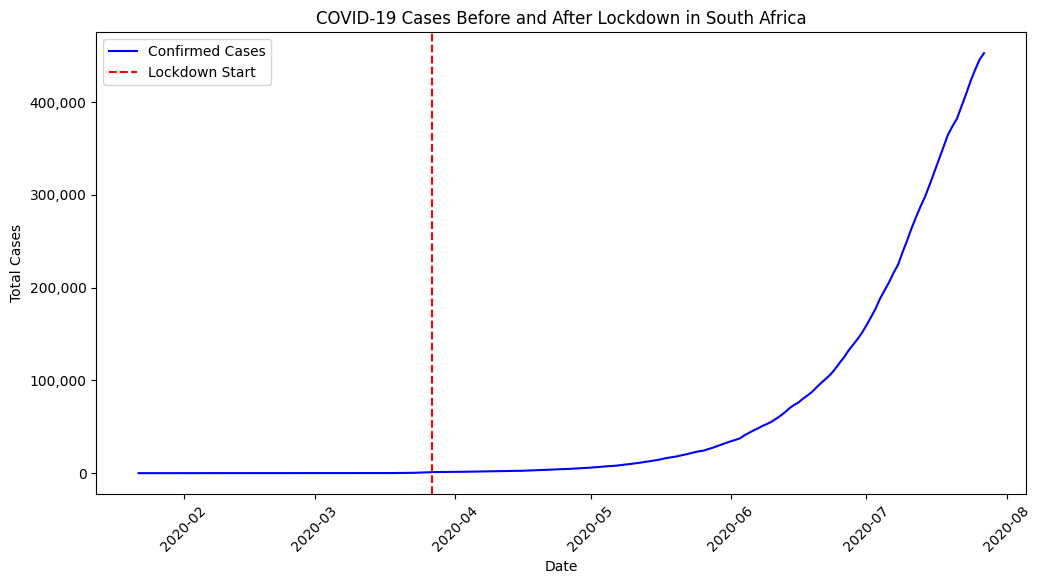

In [63]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib import dates as mdates
from matplotlib import ticker as ticker

covid_data = pd.read_csv("covid19_cleaned.csv")
# Convert 'Date' column to datetime format
covid_data['Date'] = pd.to_datetime(covid_data['Date'])

# Filter data for a South Africa
south_africa_data = covid_data[covid_data['Country'] == 'South Africa']

# Plot confirmed cases over time
plt.figure(figsize=(12,6))
plt.plot(south_africa_data['Date'], south_africa_data['Confirmed'], label='Confirmed Cases', color='blue')

# Mark lockdown start date
lockdown_date = pd.to_datetime('2020-03-27')
plt.axvline(x=lockdown_date, color='red', linestyle='dashed', label='Lockdown Start')

# Format x-axis for better readability
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.title('COVID-19 Cases Before and After Lockdown in South Africa')
plt.legend()
plt.xticks(rotation=45)
plt.show()

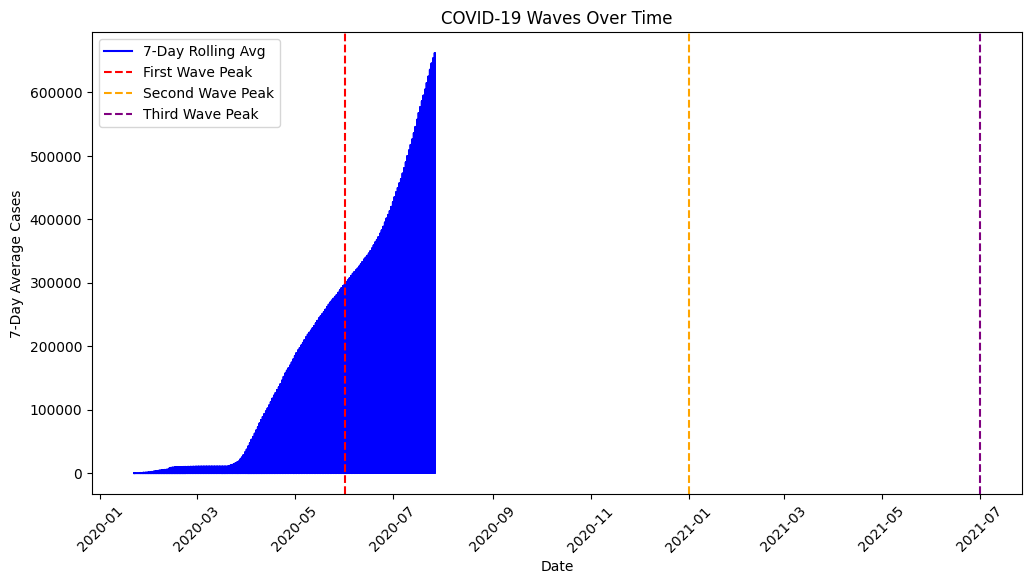

In [65]:
# Calculate 7-day rolling average for confirmed cases
covid_data['Rolling_Avg'] = covid_data['Confirmed'].rolling(window=7).mean()

# Plot case trends
plt.figure(figsize=(12,6))
plt.plot(covid_data['Date'], covid_data['Rolling_Avg'], label='7-Day Rolling Avg', color='blue')

# Mark key wave peaks
wave1 = pd.to_datetime('2020-06-01')
wave2 = pd.to_datetime('2021-01-01')
wave3 = pd.to_datetime('2021-07-01')

plt.axvline(x=wave1, color='red', linestyle='dashed', label='First Wave Peak')
plt.axvline(x=wave2, color='orange', linestyle='dashed', label='Second Wave Peak')
plt.axvline(x=wave3, color='purple', linestyle='dashed', label='Third Wave Peak')

plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('7-Day Average Cases')
plt.title('COVID-19 Waves Over Time')
plt.legend()
plt.show()